<a href="https://colab.research.google.com/github/Hawada898/Heart-Disease-Risk-Prediction/blob/master/Heart_Disease_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

np.random.seed(10)

In [2]:
#loading the data from the drive
df = pd.read_csv("/content/drive/MyDrive/Data/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
#filling the Nan values with the median values
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].median())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97ca743d50>,
      dtype=object)

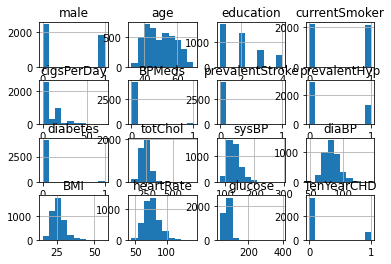

In [5]:
#visualizing the data
df.hist()

In [6]:
#splitting the data between training and testing sets
df = shuffle(df)
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [7]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,3390.0,0.428614,0.494951,0.00,0.00,0.0,1.0000,1.00
age,3390.0,49.572566,8.594014,32.00,42.00,49.0,57.0000,70.00
education,3390.0,1.976991,1.007526,1.00,1.00,2.0,3.0000,4.00
currentSmoker,3390.0,0.491445,0.500001,0.00,0.00,0.0,1.0000,1.00
cigsPerDay,3390.0,8.928909,11.963748,0.00,0.00,0.0,20.0000,60.00
BPMeds,3390.0,0.028319,0.165906,0.00,0.00,0.0,0.0000,1.00
prevalentStroke,3390.0,0.006195,0.078474,0.00,0.00,0.0,0.0000,1.00
prevalentHyp,3390.0,0.312094,0.463416,0.00,0.00,0.0,1.0000,1.00
diabetes,3390.0,0.026844,0.161650,0.00,0.00,0.0,0.0000,1.00
totChol,3390.0,236.771386,43.863531,107.00,206.00,234.0,262.0000,696.00


In [8]:
#Splitting the features and labels of each set
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('TenYearCHD')
test_labels = test_features.pop('TenYearCHD')

In [9]:
print(train_labels)

4089    0
1676    0
1123    0
3849    0
258     0
       ..
4063    0
1344    0
1253    1
2031    1
3564    1
Name: TenYearCHD, Length: 3390, dtype: int64


In [10]:
#Normalizing the data
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[4.2861354e-01 4.9572556e+01 1.9769909e+00 4.9144554e-01 8.9289093e+00
 2.8318582e-02 6.1946898e-03 3.1209439e-01 2.6843660e-02 2.3677141e+02
 1.3226917e+02 8.2809746e+01 2.5797760e+01 7.5844238e+01 8.1856911e+01]


In [11]:
print(normalizer(train_features).numpy())

[[-0.86609983  1.6790258  -0.9698354  ... -1.3144006  -0.6501114
   0.5814303 ]
 [-0.86609983  0.86438525 -0.9698354  ...  0.05008221 -0.6501114
  -0.9807709 ]
 [ 1.1546012   1.6790258   2.0081923  ... -0.37585416 -0.89874405
   0.17032471]
 ...
 [ 1.1546012   0.04974479  0.02284054 ...  0.23085748  0.34441942
  -0.24078086]
 [-0.86609983  1.6790258  -0.9698354  ... -0.8067434  -1.3131319
  -0.19967031]
 [ 1.1546012  -1.1140273   2.0081923  ...  1.2387421  -0.06996842
   0.12921415]]


In [12]:
#A function for building then compiling the model
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='tanh'),
      layers.Dense(64, activation='tanh'),
      layers.Dense(1, activation='sigmoid')
  ])



  model.compile(loss='binary_crossentropy',
                optimizer=tf.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
  return model

In [13]:
#using the function to acually build and compile the model
model = build_and_compile_model(normalizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 15)                31        
_________________________________________________________________
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,280
Trainable params: 5,249
Non-trainable params: 31
_________________________________________________________________


In [14]:
#training the model
history = model.fit(
    train_features, train_labels,shuffle=True,
    verbose=1, epochs=100)

Epoch 1/100
106/106 [==============================] - 1s 1ms/step - loss: 0.7298 - accuracy: 0.4714
Epoch 2/100
106/106 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.4991
Epoch 3/100
106/106 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5227
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5466
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5755
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.5947
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6118
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6301
Epoch 9/100
106/106 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6504
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6312 - accura

In [15]:
print(history.history['accuracy'])

[0.4713864326477051, 0.4991150498390198, 0.522713840007782, 0.5466076731681824, 0.5755162239074707, 0.5946902632713318, 0.611799418926239, 0.6300885081291199, 0.6504424810409546, 0.668436586856842, 0.6796460151672363, 0.6887905597686768, 0.6935103535652161, 0.7044247984886169, 0.7115043997764587, 0.7176991105079651, 0.7227138876914978, 0.7292035222053528, 0.7353982329368591, 0.7418879270553589, 0.747787594795227, 0.7513274550437927, 0.7545722723007202, 0.7595870494842529, 0.7613569498062134, 0.7681415677070618, 0.7696165442466736, 0.7746312618255615, 0.7808259725570679, 0.7855457067489624, 0.7887905836105347, 0.7929203510284424, 0.7985250949859619, 0.8005899786949158, 0.8032448291778564, 0.8070796728134155, 0.8097345232963562, 0.8129793405532837, 0.815339207649231, 0.8179941177368164, 0.8206489682197571, 0.8218289017677307, 0.8247787356376648, 0.8268436789512634, 0.8294985294342041, 0.8303834795951843, 0.8309734463691711, 0.8333333134651184, 0.8339232802391052, 0.8342182636260986, 0.83

In [16]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [TenYearCHD]')
  plt.legend()
  plt.grid(True)

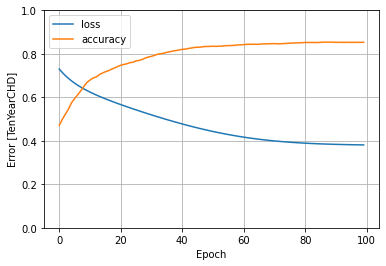

In [17]:
plot_loss(history)

In [18]:
test_loss, test_acc = model.evaluate(test_features,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

27/27 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8514
Test accuracy: 0.8514150977134705


In [19]:
test_predictions = model.predict(test_features).flatten()

In [20]:
#saving the model
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [21]:
#reloading the saved model
reloaded = tf.keras.models.load_model('model')